In [1]:
from sympy import init_printing
init_printing(use_unicode=True)

In [2]:
import numpy as np
import sympy as sy

Here we will try and derive the equations needed to find all indices of a sphere inside the `Grid`.

The `Grid` is defined by a `dcell` which are the offsets for each voxel. Simultaneously we have the description of a sphere which may be written as:
\begin{equation}
  (x - x_0) ^2 + (y - y_0) ^2 + (z-z_0)^2 = R^2
\end{equation}

In the following we will try and find the integers that defines the voxel positions.

In [3]:
a0, a1, a2 = sy.symbols('a:3', real=True, constant=True)
a = sy.Matrix([a0, a1, a2])
b0, b1, b2 = sy.symbols('b:3', real=True, constant=True)
b = sy.Matrix([b0, b1, b2])
c0, c1, c2 = sy.symbols('c:3', real=True, constant=True)
c = sy.Matrix([c0, c1, c2])
m_dot = a.cross(b).dot(c)

In [4]:
x, y, z = sy.symbols('x y z', real=True)
E = sy.Matrix([x, y, z])
R = sy.symbols('R', real=True, positive=True, constant=True)
i0, i1, i2 = sy.symbols('i:3', real=True)

In [5]:
sphere = x ** 2 + y ** 2 + z ** 2 - R ** 2
xi = x - (a0 * i0 + b0 * i1 + c0 * i2)
yi = y - (a1 * i0 + b1 * i1 + c1 * i2)
zi = z - (a2 * i0 + b2 * i1 + c2 * i2)
sphere_i = (x - xi) ** 2 + (y - yi) ** 2 + (z - zi) ** 2 - R ** 2

In [6]:
sol = sy.solve([sphere, xi, yi, zi], [i0, i1, i2])
sol_xyz = sy.solve([sphere_i, xi, yi, zi], [x, y, z])

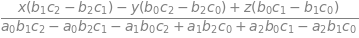

In [7]:
sol[i0]

In [8]:
sy.simplify(sol[i0] - E.cross(b).dot(c) / m_dot)

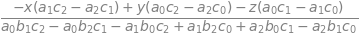

In [9]:
sol[i1]

In [10]:
sy.simplify(sol[i1] - E.cross(c).dot(a) / m_dot)

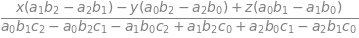

In [11]:
sol[i2]

In [12]:
sy.simplify(sol[i2] - E.cross(a).dot(b) / m_dot)

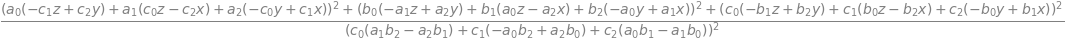

In [13]:
(E.cross(b).dot(c) ** 2 + E.cross(c).dot(a) ** 2 + E.cross(a).dot(b) ** 2) / m_dot ** 2

In [14]:
print(sol_xyz)

{x: a0*i0 + b0*i1 + c0*i2, y: a1*i0 + b1*i1 + c1*i2, z: a2*i0 + b2*i1 + c2*i2}
